In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re  
import nltk
import string
from bs4 import BeautifulSoup
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from textblob import TextBlob

In [2]:
df = pd.read_csv('asos_transform.csv')

In [3]:
df['Contents'][4]

"Rebecca was patient and helpful with my queries, though there seems to be some logistic issues with ASOS delivery. I've only received 1 out of the 4 parcels that were deemed to be delivered on the same day."

In [4]:
def remove_punctuation(text):
    no_punct="".join([c for c in text if c not in string.punctuation])
    return no_punct

In [5]:
df['Contents'] = df['Contents'].apply(lambda x: remove_punctuation(x))
df['Contents'].head()

0    I love ASOS and allCustomer service they are j...
1    My order was left outside and the school kids ...
2                           Helpful and friendly staff
3    Replied quickly and made sure their customers ...
4    Rebecca was patient and helpful with my querie...
Name: Contents, dtype: object

In [6]:
tokenizer = RegexpTokenizer(r'\w+')

In [7]:
df['Contents']=df['Contents'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['Contents'].head(20)

0     [i, love, asos, and, allcustomer, service, the...
1     [my, order, was, left, outside, and, the, scho...
2                       [helpful, and, friendly, staff]
3     [replied, quickly, and, made, sure, their, cus...
4     [rebecca, was, patient, and, helpful, with, my...
5     [fast, kind, clear, answer, perfect, that, i, ...
6     [it, took, over, 20, minutes, to, be, connecte...
7     [terrible, firm, i, had, such, a, bad, time, t...
8                   [very, helpful, clear, and, prompt]
9     [ordered, a, vivienne, westwood, which, was, d...
10    [terrible, paid, for, next, day, delivery, and...
11                               [excellent, and, easy]
12    [renee, at, asos, was, very, friendly, and, pr...
13    [items, ordered, on, 112, on, standard, 35, da...
14    [terrible, experience, courier, left, my, parc...
15    [no, customer, support, at, allleave, your, me...
16    [i, had, issue, with, the, delivery, of, my, o...
17    [my, issue, remains, unresolved, and, i, h

In [8]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [9]:
df['Contents']= df['Contents'].apply(lambda x : remove_stopwords(x))
df['Contents'].head(10)

0         [love, asos, allcustomer, service, adorable]
1    [order, left, outside, school, kids, ransacked...
2                           [helpful, friendly, staff]
3     [replied, quickly, made, sure, customers, happy]
4    [rebecca, patient, helpful, queries, though, s...
5    [fast, kind, clear, answer, perfect, love, aso...
6    [took, 20, minutes, connected, online, chat, s...
7    [terrible, firm, bad, time, trying, get, deliv...
8                             [helpful, clear, prompt]
9    [ordered, vivienne, westwood, delivered, time,...
Name: Contents, dtype: object

In [10]:
def remove_asos(text):
    asos = ['asos']
    words = [w for w in text if w not in asos]
    return words

In [11]:
df['Contents']= df['Contents'].apply(lambda x : remove_asos(x))
df['Contents'].head(10)

0               [love, allcustomer, service, adorable]
1    [order, left, outside, school, kids, ransacked...
2                           [helpful, friendly, staff]
3     [replied, quickly, made, sure, customers, happy]
4    [rebecca, patient, helpful, queries, though, s...
5    [fast, kind, clear, answer, perfect, love, ser...
6    [took, 20, minutes, connected, online, chat, s...
7    [terrible, firm, bad, time, trying, get, deliv...
8                             [helpful, clear, prompt]
9    [ordered, vivienne, westwood, delivered, time,...
Name: Contents, dtype: object

In [12]:
#Instatiate Stemmer
stemmer = SnowballStemmer('english')

In [13]:
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

In [14]:
df['Contents']=df['Contents'].apply(lambda x:word_stemmer(x))
df['Contents'].head(10)

0                           love allcustom servic ador
1    order left outsid school kid ransack howev her...
2                                    help friend staff
3                   repli quick made sure custom happi
4    rebecca patient help queri though seem logist ...
5           fast kind clear answer perfect love servic
6    took 20 minut connect onlin chat servic upon w...
7    terribl firm bad time tri get deliv wont use u...
8                                    help clear prompt
9    order vivienn westwood deliv time arriv seal w...
Name: Contents, dtype: object

In [15]:
df_results = df['Contents'].apply(lambda x: TextBlob(x).polarity)
df_results

0       0.500000
1       0.200000
2       0.000000
3       0.416667
4       0.000000
5       0.480000
6      -0.400000
7      -0.366667
8       0.100000
9       0.077381
10      0.000000
11      0.000000
12      0.800000
13      0.112500
14     -0.051948
15      0.000000
16      0.136364
17      0.000000
18      0.333333
19      0.000000
20      0.000000
21     -0.275000
22     -0.100000
23      0.141667
24      0.000000
25      0.000000
26      0.516667
27      0.200000
28      0.000000
29     -0.033333
          ...   
1970    0.000000
1971    0.400000
1972    0.600000
1973   -0.333333
1974    0.000000
1975    0.300000
1976    0.083333
1977    0.000000
1978    0.411111
1979    0.800000
1980    0.000000
1981    0.800000
1982    0.800000
1983    0.312121
1984    0.000000
1985    0.000000
1986    0.000000
1987    0.600000
1988    0.136364
1989    0.000000
1990    0.566667
1991    1.000000
1992    0.800000
1993    0.500000
1994    0.433333
1995    0.318182
1996    0.800000
1997    0.2000

In [16]:
df_results.sum()

452.92346125222764

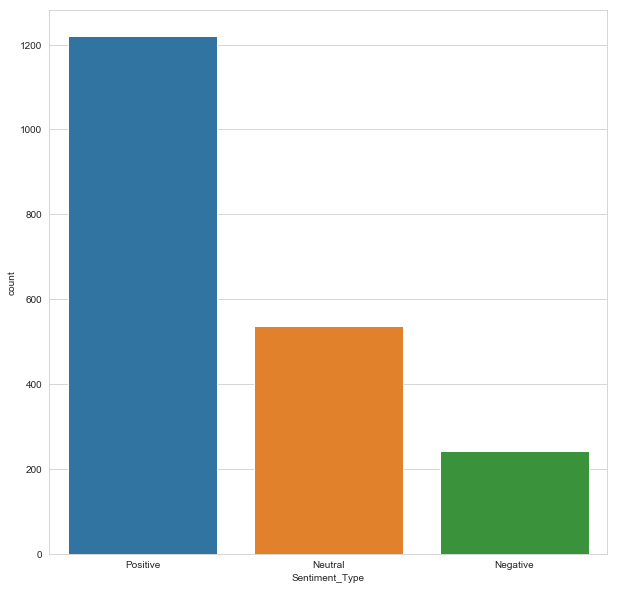

In [17]:
bloblist_tags = list()

df_str =df['Contents']
for row in df_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_str = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])

def f_tags(df_str):
    if df_str['sentiment'] > 0:
        val = "Positive"
    elif df_str['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_str['Sentiment_Type'] = df_str.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_str)

In [29]:
df_str.groupby('Sentiment_Type').apply(lambda x: (x['Sentiment_Type']).count())

Sentiment_Type
Negative     243
Neutral      537
Positive    1220
dtype: int64

In [ ]:
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 60)
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')

In [ ]:
from collections import Counter

top_N = 10
       

# Calculate frequency distribution
word_dist = nltk.FreqDist(df['Contents'])
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [ ]:
wc(df['Contents'],'white','Common Words' )